In [2]:
import csv
import re

In [12]:
f_sim_loaded = []
mag_sim_loaded = []
phase_sim_loaded = []
with open('zo.txt', encoding = 'unicode_escape') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t')
    first = True
    for row in spamreader:
        if first:
            first = False
            continue
        f_sim_loaded.append(float(row[0]))
        p = re.compile(r'\((?P<magnitude>.*)dB,(?P<phase>.*)°\)')
        m = p.search(row[1])
        mag_sim_loaded.append(10**(float(m.group('magnitude'))/20))
        phase_sim_loaded.append(float(m.group('phase')))

In [19]:
f_medicion_loaded = [
1,
10,
100,
1.00E+03,
1.00E+04,
5.00E+04,
1.00E+05
]
mag_medicion_loaded = [
1.071698113,
0.1279847182,
0.1694693164,
0.1740271098,
0.2421138401,
0.7027353525,
2.647058824,
]

In [17]:
from matplotlib import pyplot as plt

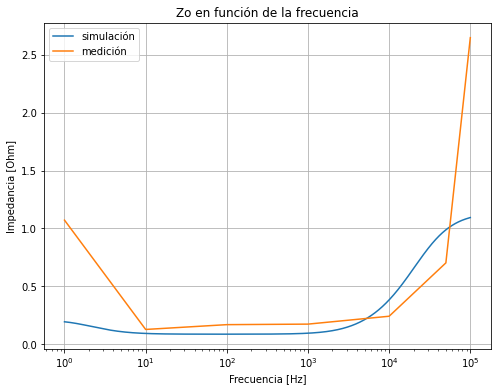

In [22]:
plt.figure(figsize=(8, 6))
plt.semilogx(f_sim_loaded, mag_sim_loaded, label='simulación')    # Bode magnitude plot
#plt.semilogx(f_sim_OL, mag_sim_OL, label='simulación OL')    # Bode magnitude plot
plt.semilogx(f_medicion_loaded, mag_medicion_loaded, label='medición')    # Bode magnitude plot
#plt.semilogx(f_medicion_OL, mag_medicion_OL, label='medición OL')    # Bode magnitude plot
plt.grid()
plt.title('Zo en función de la frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Impedancia [Ohm]')
plt.legend()
plt.savefig('zo.png')

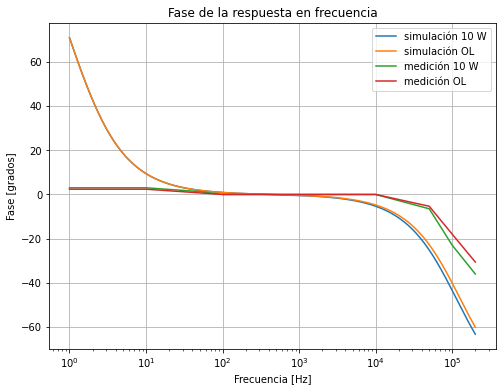

In [37]:
plt.figure(figsize=(8, 6))
plt.semilogx(f_sim_10w, phase_sim_10w, label='simulación 10 W')  # Bode phase plot
plt.semilogx(f_sim_OL, phase_sim_OL, label='simulación OL')  # Bode phase plot
plt.semilogx(f_medicion_10W, phase_medicion_10W, label='medición 10 W')  # Bode phase plot
plt.semilogx(f_medicion_OL, phase_medicion_OL, label='medición OL')  # Bode phase plot
plt.grid()
plt.title('Fase de la respuesta en frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.legend()
plt.savefig('bw_phase.png')